# Model `Asso`

An example of prediction task using `Asso` with k-fold `CrossValidation` and `RatioSplit` on `MovieLensData`.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
k = 10

[I] m            : 300
[I] n            : 500
[I] k            : 10
[I] overlap      : 4
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


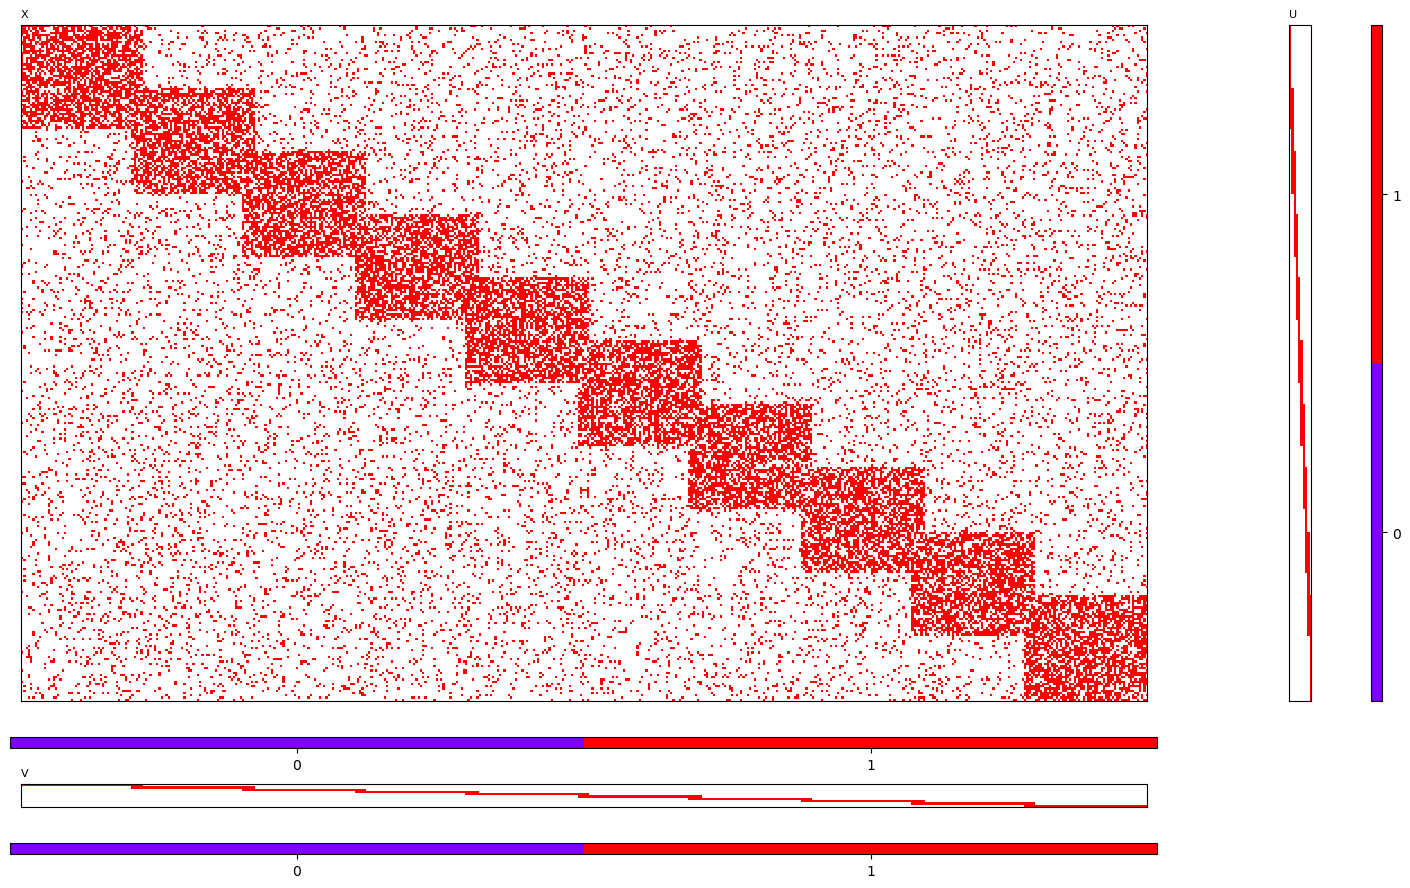

<Figure size 640x480 with 0 Axes>

In [3]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=k, overlap=[0.4, 0.1, 0.4, 0.1])
data.generate(seed=1000)
data.add_noise(noise=[0.4, 0.1], seed=2000)
# tau = 0.3
data.show_matrix()

In [4]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

## 1. `Asso` with `CrossValidation`

In [5]:
# from datasets import CrossValidation

# n_folds = 3

# cv = CrossValidation(X=data.X, test_size=0.2, n_folds=n_folds, seed=1997)
# cv.negative_sample(
#     train_val_size=cv.pos_train_val_size, 
#     test_size=cv.pos_test_size, 
#     seed=2023, type='popularity')

In [6]:
# from models import Asso

# k = 5
# tau = 0.15
# w = 0.2

# for fold in range(n_folds):
#     # get current fold
#     cv.get_fold(current_fold=fold)
#     X_train, X_val, X_test = cv.X_train, cv.X_val, cv.X_test

#     model = Asso(k=k, tau=tau, w=w)
#     model.fit(X_train=X_train, X_val=X_val, task='prediction', verbose=False, display=False)

## 2. `Asso` with `RatioSplit`

In [7]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1718182608
[I]   train_size   : 28409
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1718182608


[I] tau          : 0.25
[I] k            : 10
[I] tol          : 0
[I] w_fp         : 0.5
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.


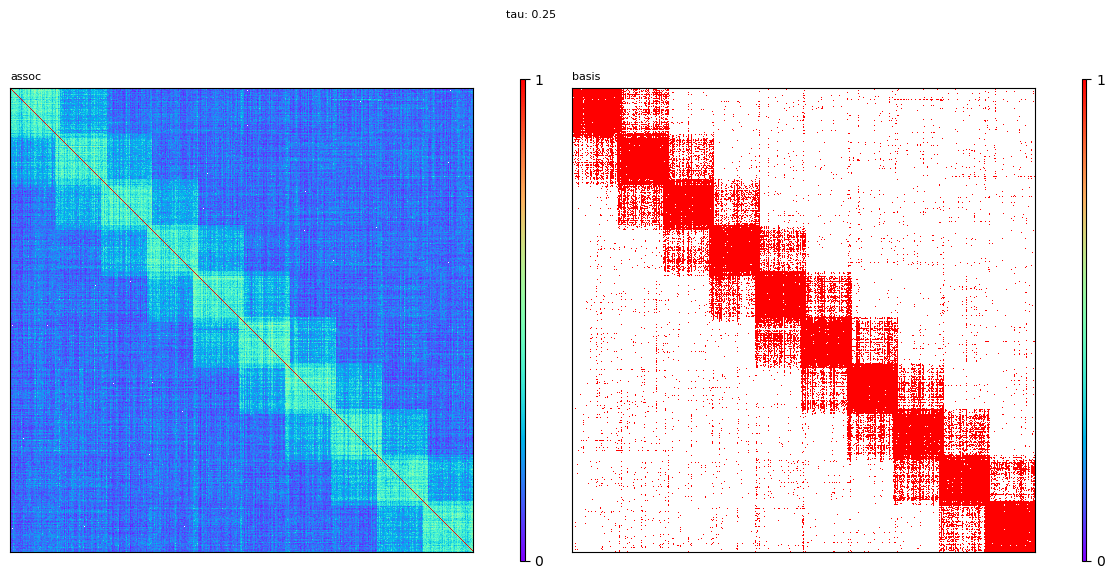

100%|██████████| 10/10 [00:33<00:00,  3.36s/it]              

[W] Stopped in advance: Reach requested factor


train                                       \
                              0                                        
                time  k   score score_0.5 desc_len      shape     TP   
0  12/06/24 04:56:54  0   289.0     289.0  27938.0   [45, 62]   1684   
1  12/06/24 04:56:57  1   575.0     575.0  27471.0   [43, 62]   3303   
2  12/06/24 04:57:01  2   781.0     781.0  27184.0  [20, 105]   4559   
3  12/06/24 04:57:04  3   983.0     983.0  26895.0   [24, 91]   5853   
4  12/06/24 04:57:07  4  1185.0    1185.0  26617.0  [18, 108]   7027   
5  12/06/24 04:57:11  5  1374.5    1374.5  26360.0  [18, 104]   8120   
6  12/06/24 04:57:14  6  1562.5    1562.5  26089.0   [34, 71]   9467   
7  12/06/24 04:57:17  7  1748.5    1748.5  25842.0  [19, 106]  10660   
8  12/06/24 04:57:20  8  1895.5    1895.5  25670.0  [18, 104]  11671   
9  12/06/24 04:57:24  9  1991.0    1991.0  25600.0  [17, 104]  12149   

                                                                            \
                                                                             
        TPR    FP       FPR     FN       FNR       ERR       ACC    Recall   
0  0.059277  1106  0.009096  26725  0.940723  0.185540  0.814460  0.059277   
1  0.116266  2153  0.017707  25106  0.883734  0.181727  0.818273  0.116266   
2  0.160477  2997  0.024648  23850  0.839523  0.178980  0.821020  0.160477   
3  0.206026  3887  0.031968  22556  0.793974  0.176287  0.823713  0.206026   
4  0.247351  4657  0.038301  21382  0.752649  0.173593  0.826407  0.247351   
5  0.285825  5371  0.044173  20289  0.714175  0.171067  0.828933  0.285825   
6  0.333239  6342  0.052158  18942  0.666761  0.168560  0.831440  0.333239   
7  0.375233  7163  0.058911  17749  0.624767  0.166080  0.833920  0.375233   
8  0.410821  7880  0.064807  16738  0.589179  0.164120  0.835880  0.410821   
9  0.427646  8167  0.067168  16260  0.572354  0.162847  0.837153  0.427646   

                       
                       
  Precision        F1  
0  0.603584  0.107952  
1  0.605389  0.195069  
2  0.603362  0.253524  
3  0.600924  0.306849  
4  0.601421  0.350535  
5  0.601883  0.387589  
6  0.598836  0.428197  
7  0.598104  0.461152  
8  0.596952  0.486697  
9  0.598002  0.498676

<Figure size 640x480 with 0 Axes>

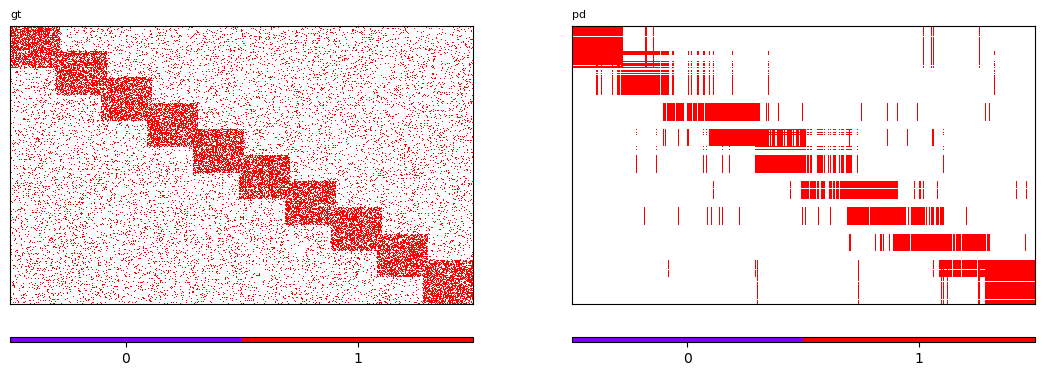

[I] model saved as: 24-06-12_16-57-24_Asso.pickle


<Figure size 640x480 with 0 Axes>

In [8]:
from models import Asso

k = 10
tau = 0.25
w_fp = 0.5

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

model = Asso(k=k, tau=tau, w_fp=w_fp)
model.fit(X_train=X_train, X_val=None, X_test=None, task='reconstruction', verbose=False, display=False)

In [9]:
# from utils import log2latex
# log2latex(model, 'updates')

In [10]:
# from utils import log2html
# log2html(model, 'updates')